In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score



In [3]:
df=pd.read_csv('../input/heart-disease-uci/heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
print ('df had {} rows'. format(df.shape[0]))

df had 303 rows


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


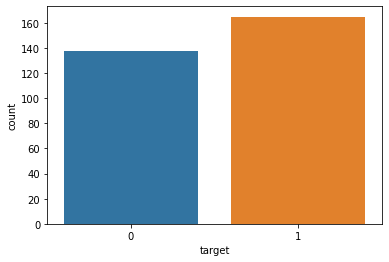

In [7]:
sns.countplot(df.target)

In [8]:
print ('taux non risque heart attack', len(df[df['target']==0])/df.shape[0])
print ('taux risque heart attack', len(df[df['target']==1])/df.shape[0])


taux non risque heart attack 0.45544554455445546
taux risque heart attack 0.5445544554455446


In [9]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [10]:
pd.pivot_table(data=df,index=['target'])

,age,ca,chol,cp,exang,fbs,oldpeak,restecg,sex,slope,thal,thalach,trestbps
target,,,,,,,,,,,,,
0,56.601449,1.166667,251.086957,0.478261,0.550725,0.159420,1.585507,0.449275,0.826087,1.166667,2.543478,139.101449,134.398551
1,52.496970,0.363636,242.230303,1.375758,0.139394,0.139394,0.583030,0.593939,0.563636,1.593939,2.121212,158.466667,129.303030


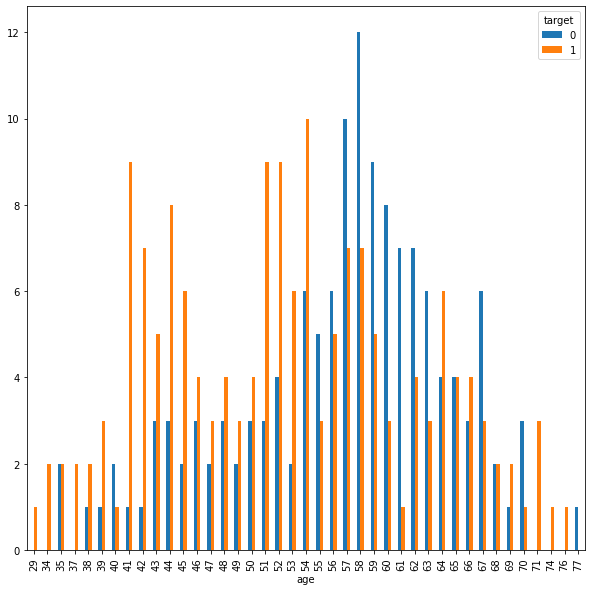

In [11]:

pd.crosstab(df.age,df.target).plot(kind='bar',figsize=(10,10))

* Higist risk is in 40 - 54 years old

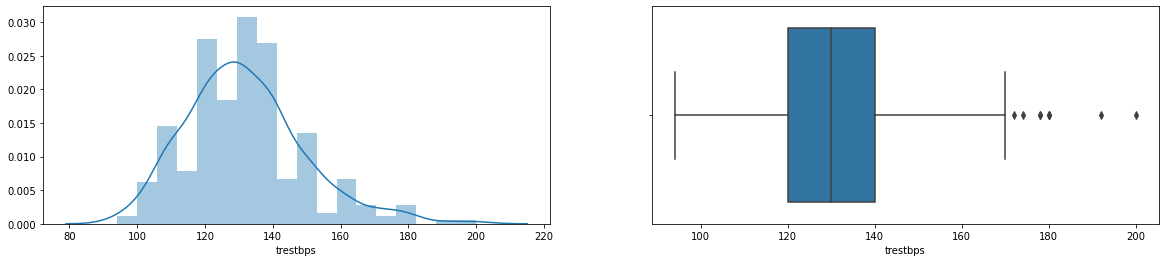

In [12]:
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['trestbps'])
f.add_subplot(1,2,2)
sns.boxplot(df['trestbps'])

* For the value of resting blood pressure or trestbps, the most numbers are ranged from 120 to 140 mmHg.
* The trestbps feature has several outliers.

In [13]:
#creat a object
KNN=  KNeighborsClassifier()

#create X, y variables
X= df.drop('target',axis=1)
y=df['target']

#decoupage train et test set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=3)

# train model

a = KNN.fit(X_train, y_train)

#Predict test data set.
y_pred = a.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

#Checking performance of model with ROC Score.
print ('score by AUC', roc_auc_score(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.57      0.68      0.62        38
           1       0.73      0.62      0.67        53

    accuracy                           0.65        91
   macro avg       0.65      0.65      0.65        91
weighted avg       0.66      0.65      0.65        91

score by AUC 0.653426017874876


From the classification report, it can be seen that the model has an average performance of around 65% ranging from precision, recall, f1-score, and support. Accuracy also shows in value of 65%.

*Then for the AUC score, it can be seen that the value is around 65%

# **Improve Model Performance by hyperparametre**

Tree hyperparametre to improve

* changer K :  n_neighbors 
* Metric


In [14]:
param_grid = {'n_neighbors':range(1,30),'metric':['euclidean','manhattan']}
grid = GridSearchCV(KNN, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)






GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 30)},
             scoring='accuracy')

In [15]:
grid.best_score_

0.725974025974026

In [16]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 23}

**Conclusion**
* on a augmenté le score de 0.65 à 0.72 avec metric: manhattan et n_neighbors :23

# Another way

In [17]:
# search for an optimal value of K for KNN

# list of integers 1 to 30
# integers we want to try
k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)


[0.5852813852813853, 0.6179653679653679, 0.5805194805194805, 0.6038961038961039, 0.6277056277056277, 0.6227272727272727, 0.6367965367965368, 0.6363636363636364, 0.6647186147186148, 0.6413419913419913, 0.6835497835497837, 0.6463203463203462, 0.6361471861471861, 0.6411255411255411, 0.6456709956709956, 0.6370129870129869, 0.6603896103896104, 0.6701298701298702, 0.6746753246753248, 0.6746753246753248, 0.688961038961039, 0.688961038961039, 0.7077922077922079, 0.6941558441558442, 0.6891774891774892, 0.7034632034632036, 0.6887445887445888, 0.6748917748917749, 0.6751082251082251, 0.6612554112554113]


Text(0, 0.5, 'Cross-Validated Accuracy')

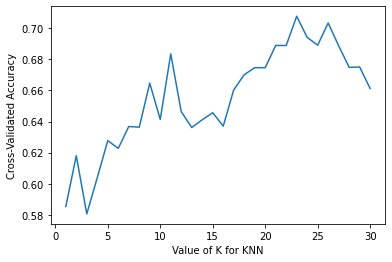

In [18]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# Encore ameliorer avec standar scaler

In [19]:
from sklearn.preprocessing import StandardScaler
#Create copy of dataset.
df_model = df.copy()
#Rescaling features age, trestbps, chol, thalach, oldpeak.
scaler = StandardScaler()
features = [['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])
#Create KNN Object
knn = KNeighborsClassifier(n_neighbors=23,metric='manhattan')
#Create x and y variable
x = df_model.drop(columns=['target'])
y = df_model['target']
#Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)
#Training the model
knn.fit(x_train, y_train)
#Predict testing set
y_pred = knn.predict(x_test)
#Check performance using accuracy
print(classification_report(y_test, y_pred))
#Check performance using roc
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.93      0.66      0.77        38
           1       0.80      0.96      0.87        53

    accuracy                           0.84        91
   macro avg       0.86      0.81      0.82        91
weighted avg       0.85      0.84      0.83        91



0.8100794438927508

# **Feature selection by high corelatio

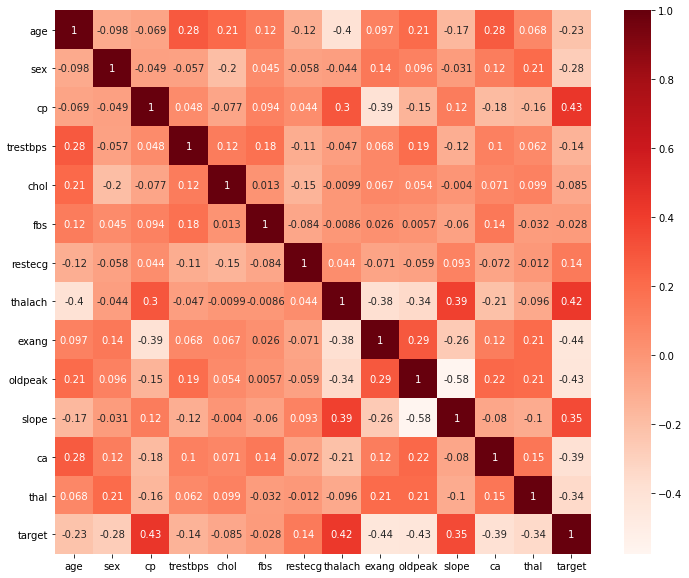

In [20]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [21]:
#Correlation with output variable
cor_target = abs(cor['target'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

cp         0.433798
thalach    0.421741
exang      0.436757
oldpeak    0.430696
slope      0.345877
ca         0.391724
thal       0.344029
target     1.000000
Name: target, dtype: float64

In [22]:
x1=df[['cp','thalach','exang','oldpeak','slope','ca','thal']]
y1=df['target']

In [23]:
#Create KNN Object
knn3 = KNeighborsClassifier(n_neighbors=23,metric='manhattan')
#Split data
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=3)
#Training the model
knn.fit(x_train, y_train)
#Predict testing set
y_pred = knn.predict(x_test)
#Check performance using accuracy
print(classification_report(y_test, y_pred))
#Check performance using roc
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.68      0.55      0.61        38
           1       0.72      0.81      0.76        53

    accuracy                           0.70        91
   macro avg       0.70      0.68      0.68        91
weighted avg       0.70      0.70      0.70        91



0.6819761668321748